In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [ ]:
#dense layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=3)
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2602 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1069 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9760
INFO:tensorflow:Assets written to: handwritten.model/assets


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9708


In [ ]:
loss

0.09207266569137573

In [ ]:
accuracy

0.97079998254776

This digit is probably a 1


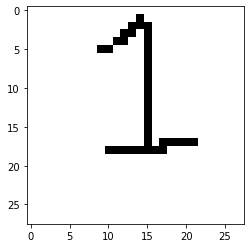

This digit is probably a 3


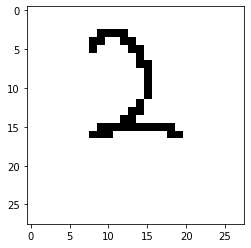

This digit is probably a 3


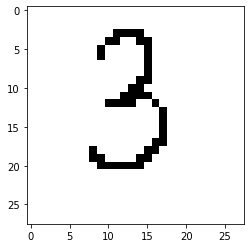

This digit is probably a 4


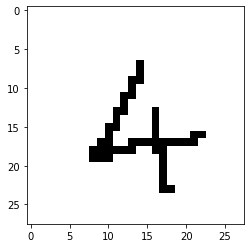

This digit is probably a 8


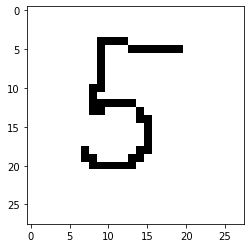

This digit is probably a 6


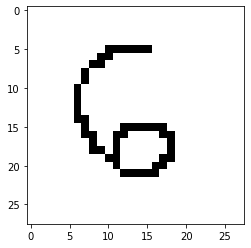

This digit is probably a 3


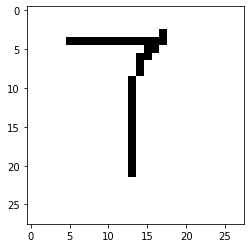

This digit is probably a 3


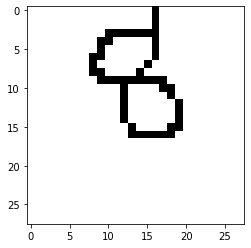

This digit is probably a 3


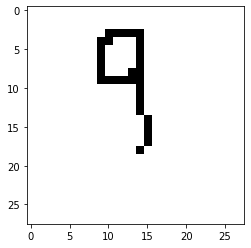

This digit is probably a 8


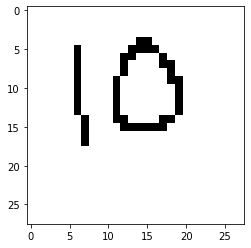

In [ ]:
image_number = 1
while os.path.isfile(f'digit{image_number}.png'):
  try:
    img = cv2.imread(f"digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number +=1